In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
def logBinomial(x,n,r):
    return r*np.log(x) + (n-r)*np.log(1.-x)

def logJeffreys(x):
    return -0.5*np.log10(x*(1.-x))

def Binomial(x,n,r):
    return x**r * (1.-x)**(n-r)

def Jeffreys(x):
    return 1./np.sqrt(x*(1.-x))

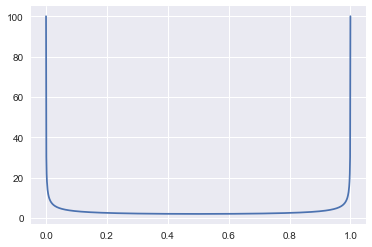

In [6]:
# F_RQ
x = np.linspace(0.0001,0.9999,1000)

# using non-informative Jeffreys Prior for Binomial distribution
plt.plot(x, Jeffreys(x))

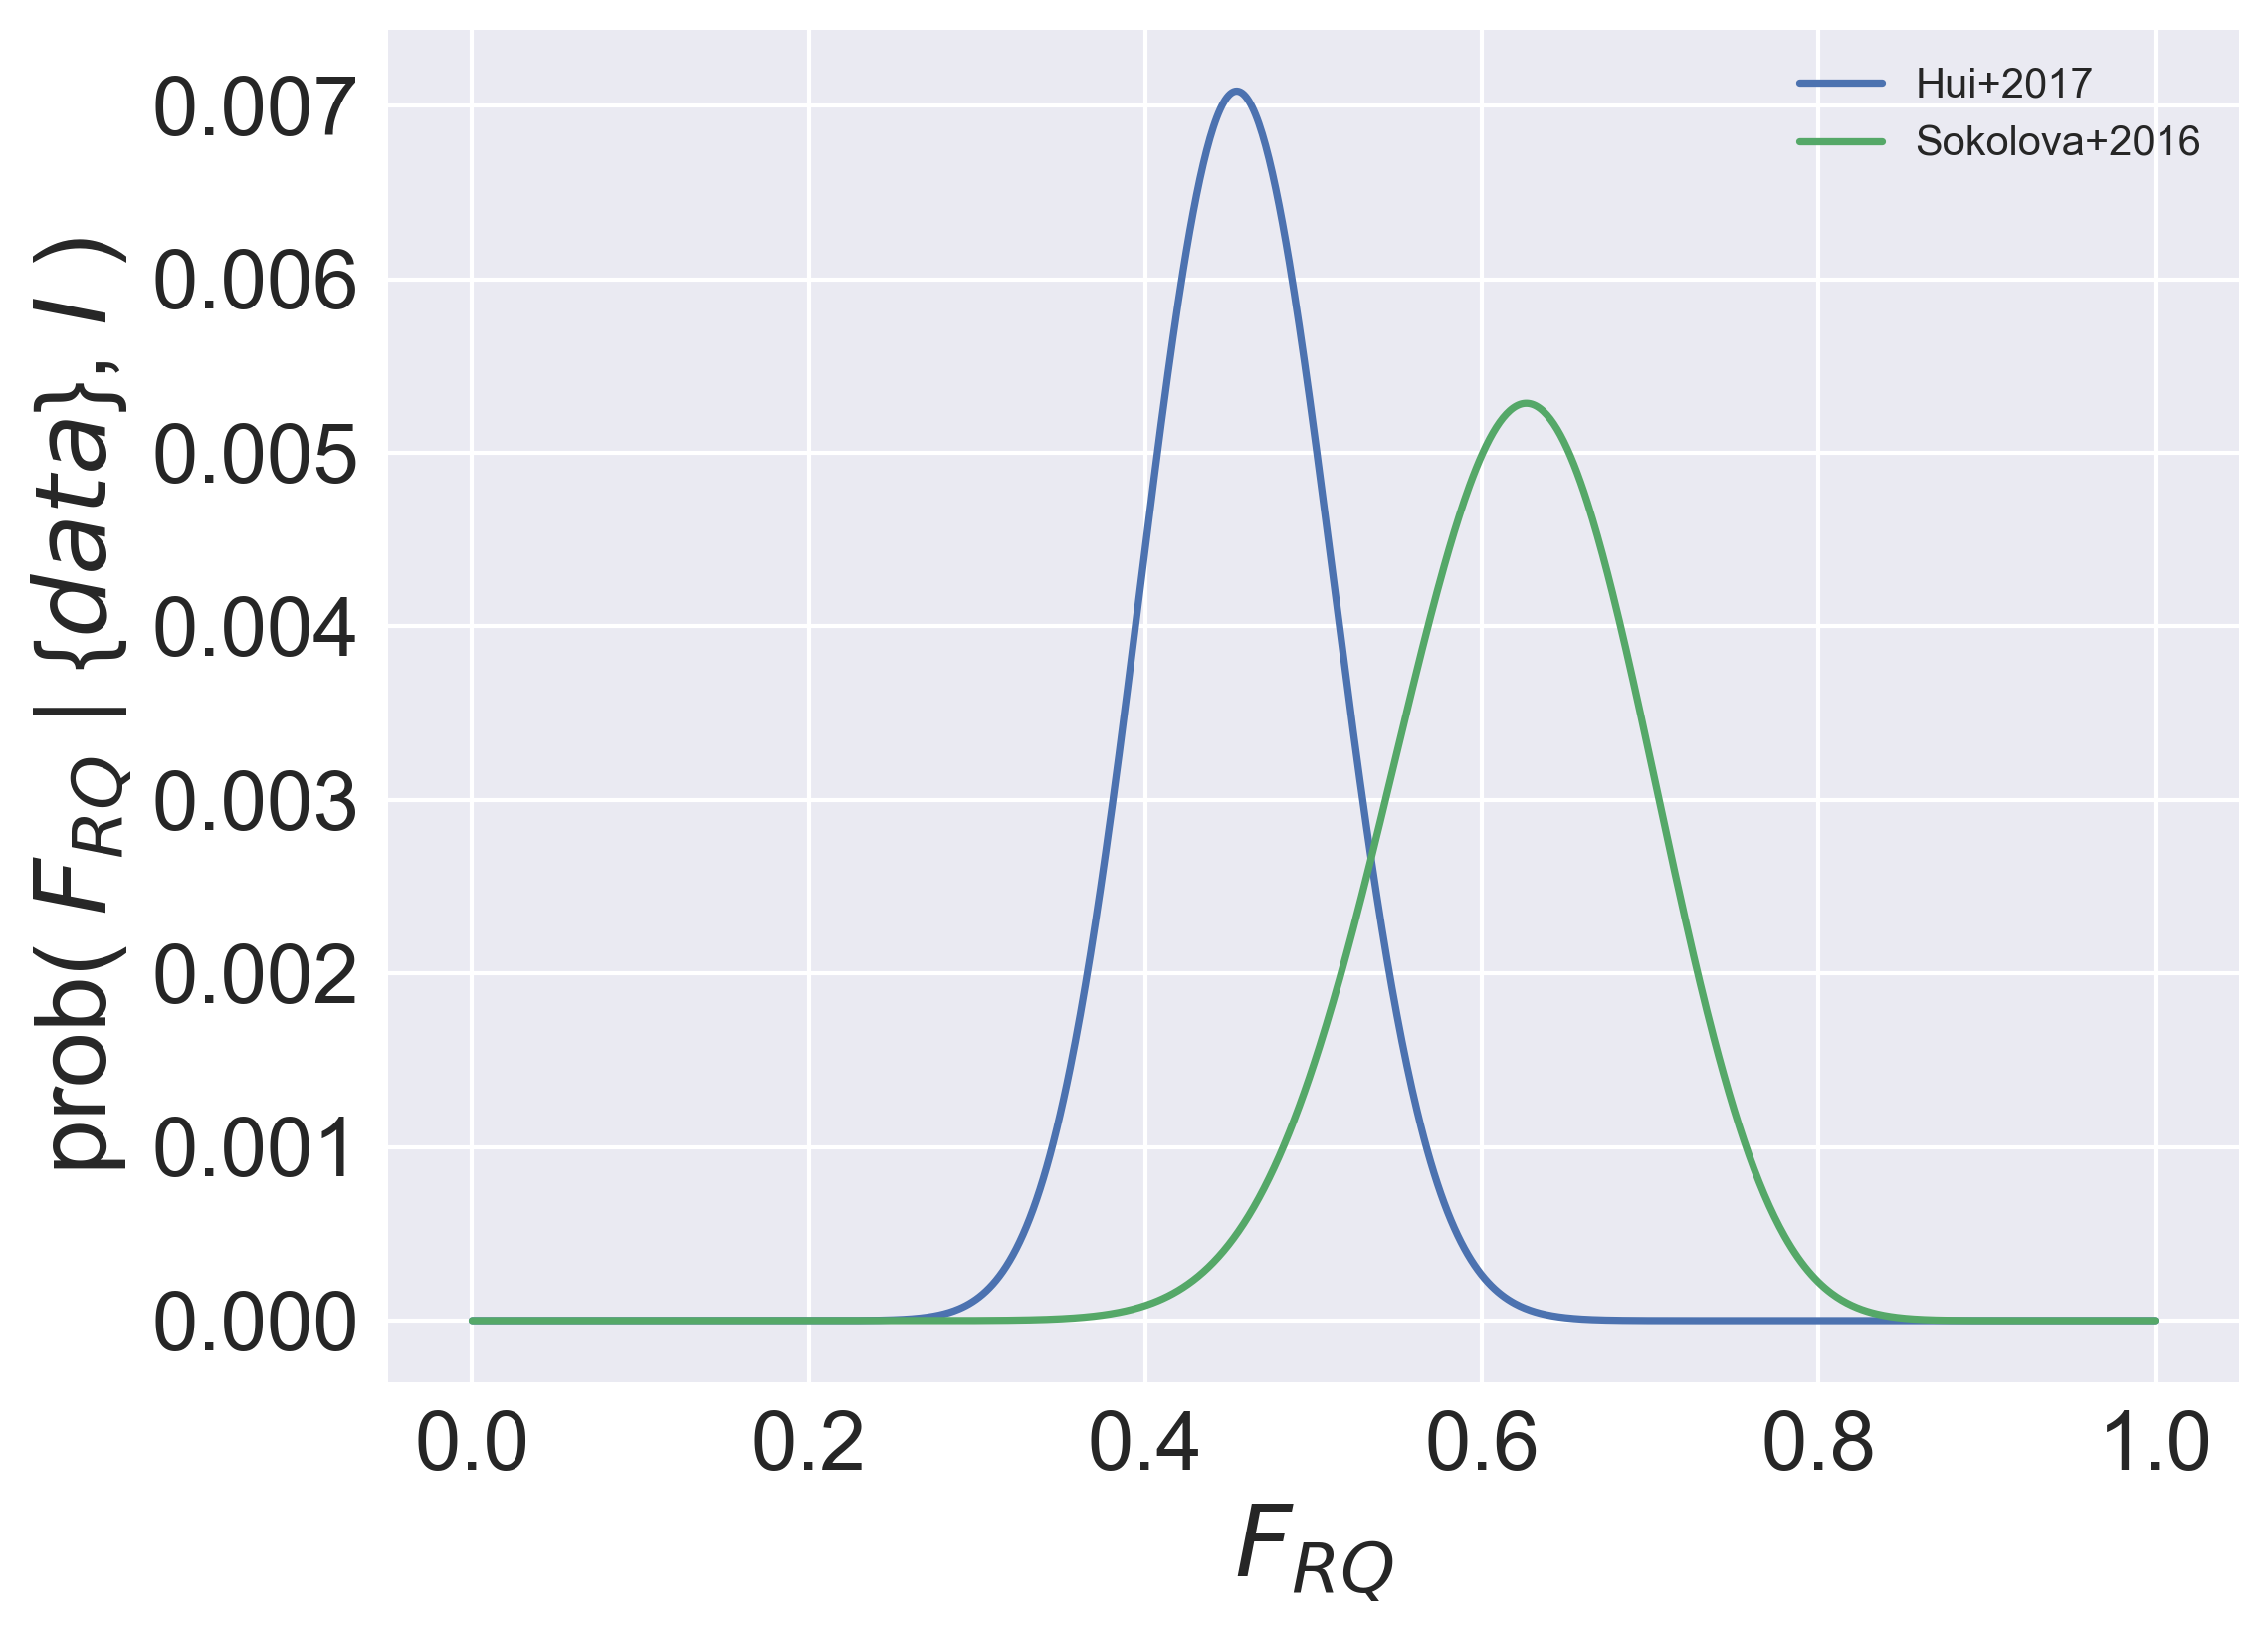

In [4]:
# define the prior
prior = logJeffreys(x)


# define the likelihoods
likelihood_Hui = logBinomial(x, 77, 35)
likelihood_Sok = logBinomial(x, 40, 25)


# compute the posteriors
posterior_Hui = prior + likelihood_Hui
posterior_Hui = posterior_Hui - max(posterior_Hui)
posterior_Hui = np.exp(posterior_Hui)

posterior_Sok = prior + likelihood_Sok
posterior_Sok = posterior_Sok - max(posterior_Sok)
posterior_Sok = np.exp(posterior_Sok)


# evidence is the normalisation
evidence_Hui = sum(posterior_Hui)
posterior_Hui = posterior_Hui/evidence_Hui

evidence_Sok = sum(posterior_Sok)
posterior_Sok = posterior_Sok/evidence_Sok


sns.set()
figure(num=None, figsize=(8, 6), dpi=300)
plt.plot(x,posterior_Hui,label='Hui+2017')
plt.plot(x,posterior_Sok,label='Sokolova+2016')
plt.tick_params(labelsize=20)
xlabel(r'$F_{RQ}$',size=24)
ylabel(r'prob( $F_{RQ}$ | {$data$}, $I$ )',size=24)
plt.legend()

In [5]:
def hdpi(x, fx, alpha):
    sfx = fx.copy()
    sfx.sort()
    sfx[:] = sfx[::-1]
    lowestHeightIdx = np.min(np.where(np.cumsum(sfx) > (1. - alpha)))
    lowestHeight = sfx[lowestHeightIdx]
    return x[fx >= lowestHeight]

# level of HDPI desired
hdpiLevel = 0.95
alpha = 1. - hdpiLevel

Hui_HDPI = hdpi(x,posterior_Hui,alpha)
Sok_HDPI = hdpi(x,posterior_Sok,alpha)

print 'The maximum for Hui+2017 is', x[min(range(len(posterior_Hui)), key=lambda i:abs(posterior_Hui[i]-max(posterior_Hui)))]
print 'The', hdpiLevel*100, '% HDPI for Hui+2017 is [', Hui_HDPI[0], ',', Hui_HDPI[-1], ']'
print 'The maximum for Sokolova+2016 is', x[min(range(len(posterior_Sok)), key=lambda i:abs(posterior_Sok[i]-max(posterior_Sok)))]
print 'The', hdpiLevel*100, '% HDPI for Sokolova+2016 is [', Sok_HDPI[0], ',', Sok_HDPI[-1], ']'

The maximum for Hui+2017 is 0.454463563564
The 95.0 % HDPI for Hui+2017 is [ 0.346377077077 , 0.564551651652 ]
The maximum for Sokolova+2016 is 0.626601301301
The 95.0 % HDPI for Sokolova+2016 is [ 0.47447957958 , 0.763711011011 ]
